<a href="https://colab.research.google.com/github/iansjlee/Surface-Temperature-Change-Data-Analysis/blob/main/cis545_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIS 5450 Final Project**
#### Daniel Jacobsohn Serebrinic, Ian Lee, Emily Liu

In this project we look into climate change as it relates to global temperature changes and CO2 emissions. We use a dataset that contains temperature data for countries and cities, a dataset for CO2 emissions, as well as one for country GDP, population, and military. 

The goal of this project is to identify which key indicators have caused the increase in temperature over time to understand how climate change could be combatted. We hope to discover how different features can help us predict changes in average temperatures.


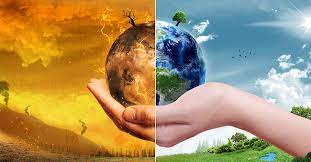








# **Part 1: Imports and Data Loading**
In this section, we import the necessary packages, as well as import the necessary datasets from Kaggle.

In [ ]:
!pip install pandasql
!pip3 install py_stringsimjoin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=a9bdf2ca01ea126d4163dd96563fe95b63d8d595566b2802a89ba402c26ee929
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 643.8/643.8 kB 32.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for py_stringsimjoin: filename=py_stringsimjoin-0.3.3-cp39-cp39-linux_x86_64.whl size=4813170 sha256=355295908f8906a0fb9ebf5f96591ac6c5e78aa69aded58bfd5a5feb853dfa69
  Stored in directory: /root/.cache/pip/wheels/9

In [ ]:
## imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps #SQL on Pandas Dataframe
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# string matching
import py_stringsimjoin as ssj
import py_stringmatching as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


## **Reading the data**

Here we read in the temperature data from the following Kaggle source: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?datasetId=29 , the CO2 data from https://www.kaggle.com/datasets/ulrikthygepedersen/co2-emissions-by-country , and the World Bank data from https://www.kaggle.com/datasets/greeshmagirish/worldbank-data-on-gdp-population-and-military.

In [ ]:
! pip install -q kaggle
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create the kaggle directory and 
# (NOTE: Do NOT run this cell more than once unless restarting kernel)
!mkdir ~/.kaggle

In [ ]:
# Read the uploaded kaggle.json file 
# before this step go to kaggle acc and create new API token
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
!!kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data

['Downloading climate-change-earth-surface-temperature-data.zip to /content',
 '',
 '  0% 0.00/84.7M [00:00<?, ?B/s]',
 '  6% 5.00M/84.7M [00:00<00:01, 49.5MB/s]',
 ' 19% 16.0M/84.7M [00:00<00:00, 86.1MB/s]',
 ' 35% 30.0M/84.7M [00:00<00:00, 111MB/s] ',
 ' 57% 48.0M/84.7M [00:00<00:00, 139MB/s]',
 ' 73% 62.0M/84.7M [00:00<00:00, 128MB/s]',
 ' 89% 75.0M/84.7M [00:00<00:00, 108MB/s]',
 '',
 '100% 84.7M/84.7M [00:00<00:00, 118MB/s]']

In [ ]:
!unzip /content/climate-change-earth-surface-temperature-data.zip

Archive:  /content/climate-change-earth-surface-temperature-data.zip
  inflating: GlobalLandTemperaturesByCity.csv  
  inflating: GlobalLandTemperaturesByCountry.csv  
  inflating: GlobalLandTemperaturesByMajorCity.csv  
  inflating: GlobalLandTemperaturesByState.csv  
  inflating: GlobalTemperatures.csv  


In [ ]:
country_temps_df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [ ]:
global_temps_df = pd.read_csv('GlobalTemperatures.csv')

In [ ]:
# Read in kaggle dataset about CO2 emissions by country and year

!!kaggle datasets download -d ulrikthygepedersen/co2-emissions-by-country

['Downloading co2-emissions-by-country.zip to /content',
 '',
 '  0% 0.00/114k [00:00<?, ?B/s]',
 '',
 '100% 114k/114k [00:00<00:00, 49.5MB/s]']

In [ ]:
!unzip /content/co2-emissions-by-country.zip

Archive:  /content/co2-emissions-by-country.zip
  inflating: co2_emissions_kt_by_country.csv  


In [ ]:
country_emissions_df = pd.read_csv('co2_emissions_kt_by_country.csv')

In [ ]:
# Read in and unzip kaggle dataset about countries and their regions
!!kaggle datasets download -d tomvebrcz/countriesandcontinents
!unzip /content/countriesandcontinents.zip
# Generate a dataframe
country_region_df = pd.read_csv('countries.csv')
country_region_df = country_region_df[['Country', 'Region']]

Archive:  /content/countriesandcontinents.zip
  inflating: countries.csv           


In [ ]:
!!kaggle datasets download -d greeshmagirish/worldbank-data-on-gdp-population-and-military

['Downloading worldbank-data-on-gdp-population-and-military.zip to /content',
 '',
 '  0% 0.00/338k [00:00<?, ?B/s]',
 '',
 '100% 338k/338k [00:00<00:00, 32.2MB/s]']

In [ ]:
!unzip /content/worldbank-data-on-gdp-population-and-military.zip

Archive:  /content/worldbank-data-on-gdp-population-and-military.zip
  inflating: API_AG.LND.TOTL.K2_DS2_en_csv_v2_511817.csv  
  inflating: API_MS.MIL.TOTL.P1_DS2_en_csv_v2_513199.csv  
  inflating: API_MS.MIL.XPND.GD.ZS_DS2_en_csv_v2_511529.csv  
  inflating: API_MS.MIL.XPND.ZS_DS2_en_csv_v2_514803.csv  
  inflating: API_NY.GDP.MKTP.CD_DS2_en_csv_v2_559588.csv  
  inflating: API_SP.POP.TOTL_DS2_en_csv_v2_511378.csv  


In [ ]:
# Land Area of the Country in Sq. Km
land_area_df = pd.read_csv('API_AG.LND.TOTL.K2_DS2_en_csv_v2_511817.csv')

In [ ]:
land_area_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

In [ ]:
land_area_df = land_area_df.drop(columns = ['Indicator Name', 'Indicator Code', 'Unnamed: 64'])

In [ ]:
total_military_df = pd.read_csv('API_MS.MIL.TOTL.P1_DS2_en_csv_v2_513199.csv')
total_military_df = total_military_df.drop(columns = ['Indicator Name', 'Indicator Code', 'Unnamed: 64'])

In [ ]:
# Military Expenditure as a % of GDP
pct_military_gdp_df = pd.read_csv('API_MS.MIL.XPND.GD.ZS_DS2_en_csv_v2_511529.csv')
pct_military_gdp_df = pct_military_gdp_df.drop(columns = ['Indicator Name', 'Indicator Code', 'Unnamed: 64'])

In [ ]:
country_gdp_df = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_559588.csv')
country_gdp_df = country_gdp_df.drop(columns = ['Indicator Name', 'Indicator Code', 'Unnamed: 64'])

In [ ]:
country_pop_df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_511378.csv')
country_pop_df = country_pop_df.drop(columns = ['Indicator Name', 'Indicator Code', 'Unnamed: 64'])

In [ ]:
land_area_df = land_area_df.melt(id_vars=["Country Name", 'Country Code'], var_name="year", value_name="land_area")

In [ ]:
total_military_df = total_military_df.melt(id_vars=["Country Name", 'Country Code'], var_name="year", value_name="total_military")

In [ ]:
pct_military_gdp_df = pct_military_gdp_df.melt(id_vars=["Country Name", 'Country Code'], var_name="year", value_name="pct_military_gdp")
country_gdp_df = country_gdp_df.melt(id_vars=["Country Name", 'Country Code'], var_name="year", value_name="gdp")
country_pop_df = country_pop_df.melt(id_vars=["Country Name", 'Country Code'], var_name="year", value_name="population")

In [ ]:
country_stats_df = land_area_df.merge(total_military_df, on = ['Country Name', 'year', 'Country Code'])\
.merge(pct_military_gdp_df, on = ['Country Name', 'year', 'Country Code'])\
.merge(country_gdp_df, on = ['Country Name', 'year', 'Country Code'])\
.merge(country_pop_df, on = ['Country Name', 'year', 'Country Code'])

country_stats_df['year'] = country_stats_df['year'].astype(int)
country_stats_df.head(2)

,Country Name,Country Code,year,land_area,total_military,pct_military_gdp,gdp,population
0,Aruba,ABW,1960,NaN,NaN,NaN,NaN,54211.0
1,Afghanistan,AFG,1960,NaN,NaN,NaN,5.377778e+08,8996973.0


# **Part 2: EDA** 
In this section, we take a few different approaches to visualize and characterize the datasets in an attempt to describe them.
By using tools such as K-means clustering and t-SNE, we also attempt to identify patterns and structures in the data. Both these tools reveal hidden patterns, relationships, and structure within the data.

### Describing the data
From looking at the first few rows of the different tables we can see that **country_temps_df** has the following columns: date, Average Temperature, Average Temperature Uncertainty, and Country. There are 243 countries in the dataset. 

**global_temps_df** has the following columns: date, Land Average Temperature, Land Average Temperature Uncertainty, Land Max Temperature,	Land Max Temperature Uncertainty,	Land Min Temperature, Land Min Temperature Uncertainty,	Land and Ocean Average Temperature, and Land and Ocean Average Temperature Uncertainty. The data starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures. 

**country_emissions_df** has the following columns: country code, country name,	year, and annual CO2 emissions. The data spans from 1960 to 2019.

**country_stats_df** contains the following features: country name, country code, year, land area of the country in square km, total military	personnel, percent GDP used towards military, GDP, and population. The data ranges from 1960 to 2019.

In [ ]:
country_temps_df.head(2)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland


In [ ]:
global_temps_df.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
global_temps_df['dt'] = pd.to_datetime(global_temps_df['dt'])
# create a new column with the year extracted from the date column
global_temps_df['year'] = global_temps_df['dt'].dt.year

In [ ]:
country_emissions_df.head(2)

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719


In [ ]:
country_emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


In [ ]:
global_temps_df['dt'].max()

Timestamp('2015-12-01 00:00:00')

In [ ]:
country_stats_df.head(2)

,Country Name,Country Code,year,land_area,total_military,pct_military_gdp,gdp,population
0,Aruba,ABW,1960,NaN,NaN,NaN,NaN,54211.0
1,Afghanistan,AFG,1960,NaN,NaN,NaN,5.377778e+08,8996973.0


In [ ]:
country_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15840 entries, 0 to 15839
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      15840 non-null  object 
 1   Country Code      15840 non-null  object 
 2   year              15840 non-null  int64  
 3   land_area         14935 non-null  float64
 4   total_military    6172 non-null   float64
 5   pct_military_gdp  9299 non-null   float64
 6   gdp               12089 non-null  float64
 7   population        15409 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.1+ MB


### Joining Additional Datasets

In this section, we join the CO2 emissions dataset and the country statistics dataset to the original average temperature dataset.

In [ ]:
from zmq import NULL
# Clean to be able to join
country_temps_df.rename(columns={'dt': 'Year'}, inplace = True)
country_temps_1960_df = country_temps_df

# Transform the date to just include the year as an int
country_temps_1960_df['Year'] = country_temps_1960_df['Year'].astype(str)
country_temps_1960_df['Year'] = country_temps_1960_df['Year'].str.split("-").str[0]
country_temps_1960_df['Year'] = country_temps_1960_df['Year'].astype(int)

# Include only years after 1960 since country_emissions only include data from 1960
country_temps_1960_df = country_temps_1960_df[country_temps_1960_df['Year'] >= 1960]

# groupby year and country so we get average temperature per year 
country_temps_1960_df = country_temps_1960_df.groupby(['Country','Year'])['AverageTemperature'].mean().reset_index()
country_temps_1960_df = country_temps_1960_df.dropna()
country_temps_1960_df.head(2)

,Country,Year,AverageTemperature
0,Afghanistan,1960,13.985417
1,Afghanistan,1961,14.064917


In [ ]:
# Restrict the data to be before 2013 because that is when the temperature data ends
country_emissions_df = country_emissions_df[country_emissions_df['year'] <= 2013]
country_emissions_df.head(2)

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719


In [ ]:
# Join on country and year
country_temp_and_emission_df = country_temps_1960_df.merge(country_emissions_df, left_on = ['Country', 'Year'], right_on = ['country_name', 'year'], how = 'inner', indicator = True)
country_temp_and_emission_df.head(2)

,Country,Year,AverageTemperature,country_code,country_name,year,value,_merge
0,Afghanistan,1960,13.985417,AFG,Afghanistan,1960,414.371,both
1,Afghanistan,1961,14.064917,AFG,Afghanistan,1961,491.378,both


By analyzing the join, we can see that there are some instances where the Country Name is slightly different between the two data sets, and so we use string similarity matching to join the data sets.

In [ ]:
ssj.profile_table_for_join(country_emissions_df)

,Unique values,Missing values,Comments
Attribute,,,
country_code,255 (2.04%),0 (0.0%),
country_name,256 (2.05%),0 (0.0%),
year,54 (0.43%),0 (0.0%),
value,8553 (68.57%),0 (0.0%),


In [ ]:
ssj.profile_table_for_join(country_temps_1960_df)

,Unique values,Missing values,Comments
Attribute,,,
Country,242 (1.85%),0 (0.0%),
Year,54 (0.41%),0 (0.0%),
AverageTemperature,12325 (94.31%),0 (0.0%),


In [ ]:
# we can use these columns as key attributes
country_temps_1960_df['Country_Year'] = country_temps_1960_df['Country'] + '_' + country_temps_1960_df['Year'].astype(str)
country_emissions_df['country_name_year'] = country_emissions_df['country_name'] + '_' + country_emissions_df['year'].astype(str)
country_emissions_df["country_name"] = country_emissions_df['country_name'].str.replace('[^\w\s]','')

<ipython-input-41-1b293121e78d>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  country_emissions_df["country_name"] = country_emissions_df['country_name'].str.replace('[^\w\s]','')


In [ ]:
# Now let's do a similarity join

# Matching the strings via q-grams with q = 4
tok = sm.QgramTokenizer(qval=3,return_set=True)


output_pairs = ssj.jaccard_join(
    country_temps_1960_df, 
    country_emissions_df, 
    l_key_attr= 'Country_Year',
    r_key_attr = 'country_name_year',
    l_join_attr='Country', 
    r_join_attr='country_name', 
    l_out_attrs=['Country', 'Year', 'AverageTemperature'], # Pass a list of strings for the output attributes in the left table
    r_out_attrs=['country_name', 'year', 'value'], # Pass a list of strings for the output attributes in the right table
    threshold=0.4, 
    tokenizer=tok
)


#print(output_pairs)
output_pairs["l_Year"] = output_pairs["l_Year"].astype(str).astype(int)
output_pairs = output_pairs[output_pairs['l_Year'] == output_pairs['r_year']]
idx = output_pairs.groupby(by ='l_Country_Year')['_sim_score'].idxmax()
emissions_temp_df = output_pairs.loc[idx, ['l_Country_Year', '_sim_score', 'l_Country', 'l_Year', 'l_AverageTemperature', 'r_value', 'r_country_name_year']]
emissions_temp_df = emissions_temp_df.rename(columns={'l_Country': 'Country', 'l_Year': 'Year', 'l_AverageTemperature': 'AverageTemperature', 'r_value': 'CarbonEmissions'})
emissions_temp_df = emissions_temp_df.drop(['l_Country_Year', '_sim_score', 'r_country_name_year'], axis = 1)
emissions_temp_df.head(2)

/usr/local/lib/python3.9/dist-packages/py_stringsimjoin/utils/generic_helper.py:76: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  projected_dataframe = dataframe[proj_attrs].dropna(0,
/usr/local/lib/python3.9/dist-packages/py_stringsimjoin/utils/generic_helper.py:76: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  projected_dataframe = dataframe[proj_attrs].dropna(0,
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


,Country,Year,AverageTemperature,CarbonEmissions
2916,Afghanistan,1960,13.985417,414.371
2971,Afghanistan,1961,14.064917,491.378


We can see that our string similarity join results in 8866 rows compared to the 7934 rows from a traditional join.

In [ ]:
emissions_temp_df['Country'].unique() # this shows that the df has various countries and 2 regions

# Merge
emissions_temp_df = emissions_temp_df.merge(country_region_df, on = ['Country'])
emissions_temp_df.head()

# groupby year and region so we get average temperature per year 
temp1_emissions_temp_regions_df = emissions_temp_df.groupby(['Region','Year'])['AverageTemperature'].mean().reset_index()
temp2_emissions_temp_regions_df = emissions_temp_df.groupby(['Region','Year'])['CarbonEmissions'].sum().reset_index()
emissions_temp_regions_df = temp1_emissions_temp_regions_df.merge(temp2_emissions_temp_regions_df, on = ['Region', 'Year'])
emissions_temp_regions_df = emissions_temp_regions_df.dropna()
emissions_temp_regions_df.head(2)

,Region,Year,AverageTemperature,CarbonEmissions
0,AFRICA,1960,25.014743,28837.288
1,AFRICA,1961,24.920086,30395.763


In [ ]:
# groupby year so we get average temperature per year globally
temp1_emissions_temp_world_df = emissions_temp_df.groupby(['Year'])['AverageTemperature'].mean().reset_index()
temp2_emissions_temp_world_df = emissions_temp_df.groupby(['Year'])['CarbonEmissions'].sum().reset_index()
emissions_temp_world_df = temp1_emissions_temp_world_df.merge(temp2_emissions_temp_world_df, on = ['Year'])
emissions_temp_world_df = emissions_temp_world_df.dropna()
emissions_temp_world_df.head(2)

,Year,AverageTemperature,CarbonEmissions
0,1960,20.172683,6467836.265
1,1961,20.179503,6376201.602


In [ ]:
#merging all dataframes
all_features_df = emissions_temp_df.merge(country_stats_df, left_on = ['Country', 'Year'], right_on = ['Country Name', 'year'])\
.drop(columns = ['Country Name', 'year'])
all_features_df['temp_change'] = all_features_df['AverageTemperature'].diff()
all_features_df.head(2)

,Country,Year,AverageTemperature,CarbonEmissions,Region,Country Code,land_area,total_military,pct_military_gdp,gdp,population,temp_change
0,Afghanistan,1960,13.985417,414.371,ASIA,AFG,NaN,NaN,NaN,5.377778e+08,8996973.0,NaN
1,Afghanistan,1961,14.064917,491.378,ASIA,AFG,652860.0,NaN,NaN,5.488889e+08,9169410.0,0.0795


In order to run algorithms such as PCA and create regression models, we need to transform our categorical data into numerical data so we do one hot encoding.


In [ ]:
encoded_df = all_features_df.drop(columns = ['Country Code'])
encoded_df = pd.get_dummies(encoded_df, columns = ['Country', 'Region'])
encoded_df.head(2)

,Year,AverageTemperature,CarbonEmissions,land_area,total_military,pct_military_gdp,gdp,population,temp_change,Country_Afghanistan,...,Country_Vietnam,Country_Zambia,Country_Zimbabwe,Region_AFRICA,Region_ASIA,Region_EUROPE,Region_LATIN,Region_NEAR_EAST,Region_NORTHERN_AMERICA,Region_OCEANIA
0,1960,13.985417,414.371,NaN,NaN,NaN,5.377778e+08,8996973.0,NaN,1,...,0,0,0,0,1,0,0,0,0,0
1,1961,14.064917,491.378,652860.0,NaN,NaN,5.488889e+08,9169410.0,0.0795,1,...,0,0,0,0,1,0,0,0,0,0


We have some null values, so we will impute missing values in order to fit models on the data.

In [ ]:
# Many models don't allow for Nan values, so we will impute the missing values
# this takes 3 minutes!
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
impute_df = pd.DataFrame(imp.fit_transform(encoded_df))
impute_df = impute_df.rename(columns=dict(zip(impute_df.columns, encoded_df.columns)))
impute_df.head(2)

,Year,AverageTemperature,CarbonEmissions,land_area,total_military,pct_military_gdp,gdp,population,temp_change,Country_Afghanistan,...,Country_Vietnam,Country_Zambia,Country_Zimbabwe,Region_AFRICA,Region_ASIA,Region_EUROPE,Region_LATIN,Region_NEAR_EAST,Region_NORTHERN_AMERICA,Region_OCEANIA
0,1960.0,13.985417,414.371,461464.128279,63163.328454,3.120139,5.377778e+08,8996973.0,-0.129311,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1961.0,14.064917,491.378,652860.000000,66321.619480,3.085322,5.488889e+08,9169410.0,0.079500,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Visualizing the data
In this section, we create illustrations of the data to better understand larger trends.

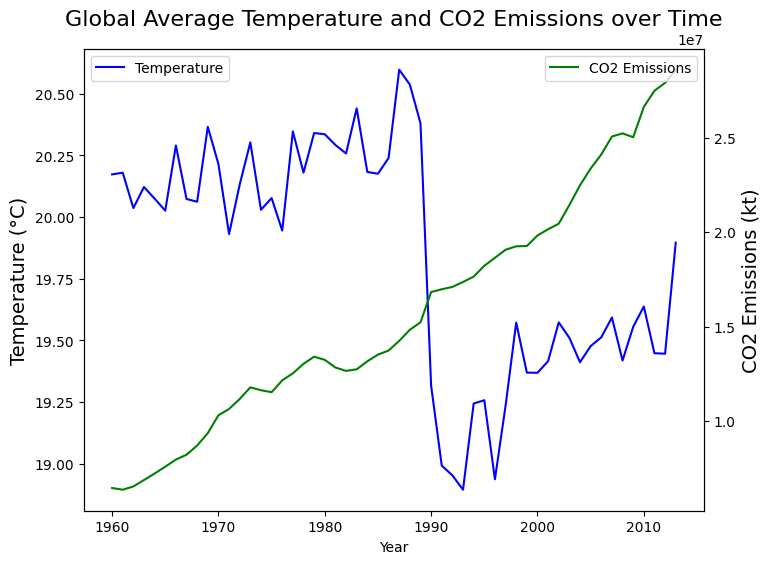

In [ ]:
# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot temperature on first y-axis
sns.lineplot(x='Year', y='AverageTemperature', data=emissions_temp_world_df, ax=ax1, color='blue', label='Temperature')
ax1.set_ylabel('Temperature (°C)', fontsize=14)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot CO2 emissions on second y-axis
sns.lineplot(x='Year', y='CarbonEmissions', data=emissions_temp_world_df, ax=ax2, color='green', label='CO2 Emissions')
ax2.set_ylabel('CO2 Emissions (kt)', fontsize=14)

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Remove gridlines
ax1.grid(False)
ax2.grid(False)

# Add title and axis labels
plt.title('Global Average Temperature and CO2 Emissions over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)

# Show the plot
plt.show()

There is a clear drop from 1989 to 1992 (~1.4 C), so to understand what happened we made a dataframe with average temperature for every region so that we could individually analyze where temperature went down during this period. Nonetheless, it is quite interesting how the average temperature globally in 2013 was still lower than 1960.

In [ ]:
# Find each region
emissions_temp_regions_df['Region'].unique()

# Africa
emissions_temp_africa_df = emissions_temp_regions_df[emissions_temp_regions_df['Region'] == "AFRICA"]
emissions_temp_africa_df # temperature drop from 1989 to 1992 is ~0.1 C, so not relevant

# Asia
emissions_temp_asia_df = emissions_temp_regions_df[emissions_temp_regions_df['Region'] == "ASIA"]
emissions_temp_asia_df # temperature drop from 1989 to 1992 is ~2.1 C, so very relevant

# Europe
emissions_temp_europe_df = emissions_temp_regions_df[emissions_temp_regions_df['Region'] == "EUROPE"]
emissions_temp_europe_df # temperature drop from 1989 to 1992 is ~0.1 C, so not relevant

# Latin
emissions_temp_latin_df = emissions_temp_regions_df[emissions_temp_regions_df['Region'] == "LATIN"]
emissions_temp_latin_df # temperature actually increased ~0.2 C from 1989 to 1992, so not relevant

# Near_East
emissions_temp_near_df = emissions_temp_regions_df[emissions_temp_regions_df['Region'] == "NEAR_EAST"]
emissions_temp_near_df # temperature also increase (by ~0.1 C) from 1989 to 1992, so not relevant

# Northern_America
emissions_temp_northern_df = emissions_temp_regions_df[emissions_temp_regions_df['Region'] == "NORTHERN_AMERICA"]
emissions_temp_northern_df # temperature drop from 1989 to 1992 is ~0.9 C, so it is relevant

# Oceania
emissions_temp_oceania_df = emissions_temp_regions_df[emissions_temp_regions_df['Region'] == "OCEANIA"]
# temperature drop from 1989 to 1992 is ~0.1 C, so not relevant

From the above step, we notice that the biggest drops in average temperature were in Asia and North America. According to [NASA](https://earthobservatory.nasa.gov/images/1510/global-effects-of-mount-pinatubo), in 1991 the volcano in Mount Pinatubo in the Philippines erupted. Volcanic eruptions can release large amounts of aerosols into the atmosphere, which can reflect sunlight and cool the Earth's surface. With more than 15 million tons of sulfur dioxide injected into the stratosphere, the world's temperature significantly cooled. It especially affected countries near the Philippines (Asia) and the Northern Hemisphere (North America), which explains the drops seen above. Another way to look at the data is to make a scatterplot and plot the trendline.

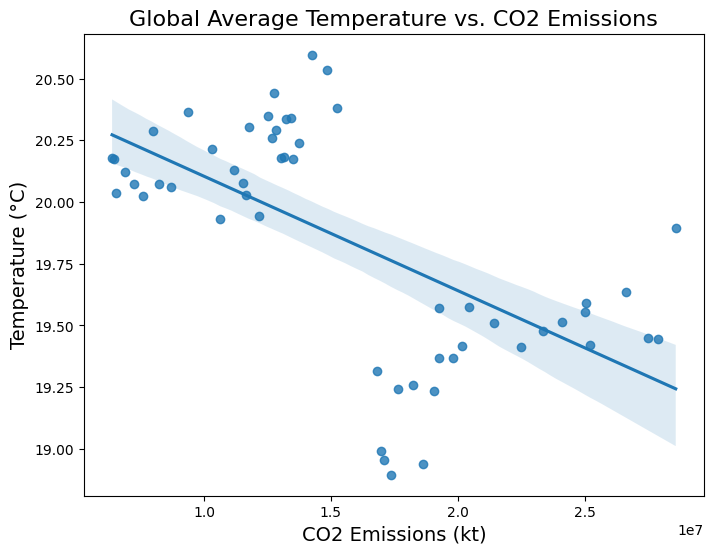

In [ ]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot scatterplot with regression line
sns.regplot(x='CarbonEmissions', y='AverageTemperature', data=emissions_temp_world_df, ax=ax)

# Add axis labels and title
plt.xlabel('CO2 Emissions (kt)', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.title('Global Average Temperature vs. CO2 Emissions', fontsize=16)

# Show the plot
plt.show()

Looking at the data above, we see two clear patterns. When CO2 emissions are smaller than 1.6 kt, there is a positive relationship between CO2 emissions and temperature, meaning that if one increases, the other does as well. The same is seen for CO2 emissions larger than 1.6 kt. Nevertheless, the trendline is downwards sloped, which again reflects the volcanic eruption in 1991. The problem is clear, let's separate the data into the 1960-1989 and 1990-2013 periods and plot that again.

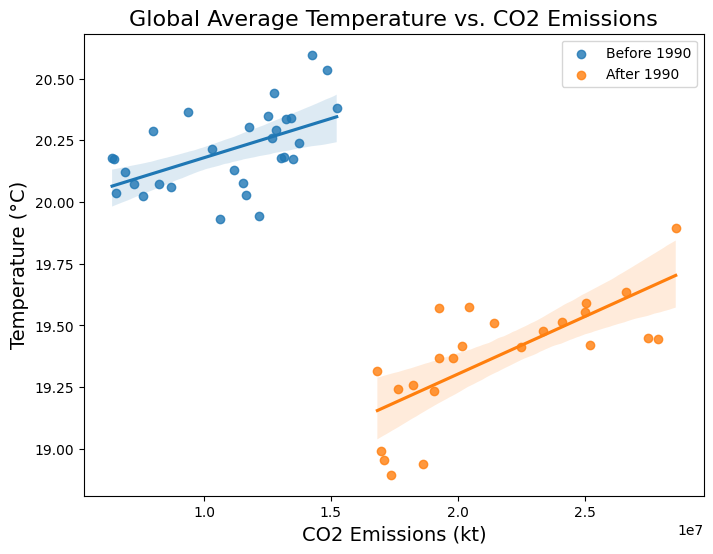

In [ ]:
# Make new dataframes for each period
emissions_temp_pre_df = emissions_temp_world_df[emissions_temp_world_df['Year'] < 1990]
emissions_temp_post_df = emissions_temp_world_df[emissions_temp_world_df['Year'] >= 1990]

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot scatterplot with regression line and add labels
sns.regplot(x='CarbonEmissions', y='AverageTemperature', data=emissions_temp_pre_df, ax=ax, label='Before 1990')
sns.regplot(x='CarbonEmissions', y='AverageTemperature', data=emissions_temp_post_df, ax=ax, label='After 1990')

# Add axis labels and title
plt.xlabel('CO2 Emissions (kt)', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.title('Global Average Temperature vs. CO2 Emissions', fontsize=16)

# Add a legend
ax.legend()

# Show the plot
plt.show()

There we go! Now we have a better sense of how carbon emissions affected temperature over time, and we see the positive relationship. The higher the carbon emissions, the higher the temperature. Another interesting thing to note is that the slope of the trendline after 1990 is steeper than the one before 1990, which we can relate to positive feedback loops of climate change. With increasing temperature, more water is evaporated from the surface, resulting in a larger presence of heat-storing water vapor in the atmosphere, which again leads to more warming in an constantly amplified cycle. Another example is that higher temperatures cause glaciers and snow to melt, revealing darker land which reflects more sunlight (albedo), hence absorbing more heat and increasing temperature, in an ongoing cycle. You can read more [here](https://scied.ucar.edu/learning-zone/earth-system/climate-system/feedback-loops-tipping-points). It is quite interesting to see this reflected graphically!

Now, let's look at the evolution of temperature and carbon emissions in each region. Let's start with Africa!

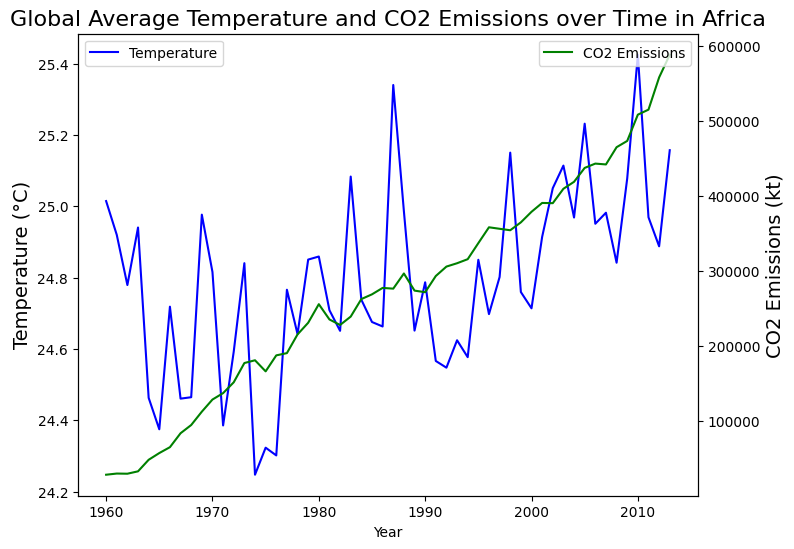

In [ ]:
# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot temperature on first y-axis
sns.lineplot(x='Year', y='AverageTemperature', data=emissions_temp_africa_df, ax=ax1, color='blue', label='Temperature')
ax1.set_ylabel('Temperature (°C)', fontsize=14)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot CO2 emissions on second y-axis
sns.lineplot(x='Year', y='CarbonEmissions', data=emissions_temp_africa_df, ax=ax2, color='green', label='CO2 Emissions')
ax2.set_ylabel('CO2 Emissions (kt)', fontsize=14)

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Remove gridlines
ax1.grid(False)
ax2.grid(False)

# Add title and axis labels
plt.title('Global Average Temperature and CO2 Emissions over Time in Africa', fontsize=16)
plt.xlabel('Year', fontsize=14)

# Show the plot
plt.show()

How fascinating! There is a clear upwards trend over the years as carbon emissions increase, but there is so much oscillation (amplitude) from year to year. Let's look at the scatterplot and trendline again.

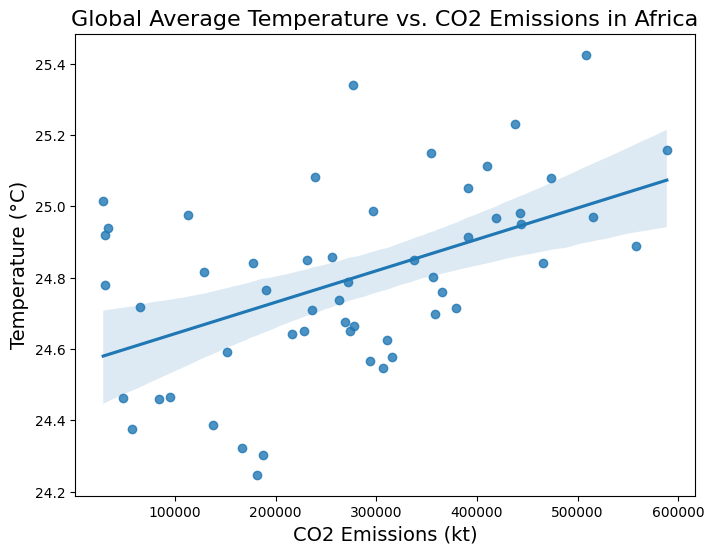

In [ ]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot scatterplot with regression line
sns.regplot(x='CarbonEmissions', y='AverageTemperature', data=emissions_temp_africa_df, ax=ax)

# Add axis labels and title
plt.xlabel('CO2 Emissions (kt)', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.title('Global Average Temperature vs. CO2 Emissions in Africa', fontsize=16)

# Show the plot
plt.show()

As expected, an overall upwards trend, as carbon emissions increased, so did temperature. Again, the points are quite scattered, why might that be?

Let's look at Asia now!

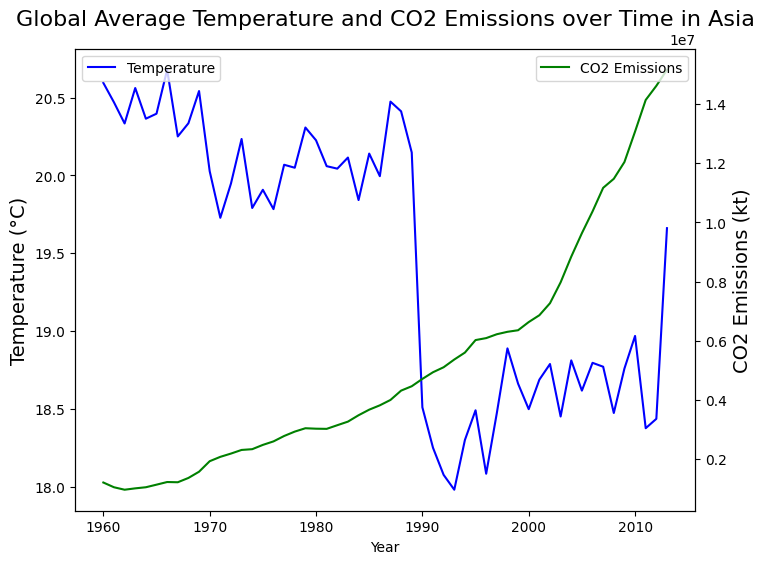

In [ ]:
# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot temperature on first y-axis
sns.lineplot(x='Year', y='AverageTemperature', data=emissions_temp_asia_df, ax=ax1, color='blue', label='Temperature')
ax1.set_ylabel('Temperature (°C)', fontsize=14)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot CO2 emissions on second y-axis
sns.lineplot(x='Year', y='CarbonEmissions', data=emissions_temp_asia_df, ax=ax2, color='green', label='CO2 Emissions')
ax2.set_ylabel('CO2 Emissions (kt)', fontsize=14)

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Remove gridlines
ax1.grid(False)
ax2.grid(False)

# Add title and axis labels
plt.title('Global Average Temperature and CO2 Emissions over Time in Asia', fontsize=16)
plt.xlabel('Year', fontsize=14)

# Show the plot
plt.show()

This lineplot is more similar to what we saw for global average temperature and carbon emissions change over time.

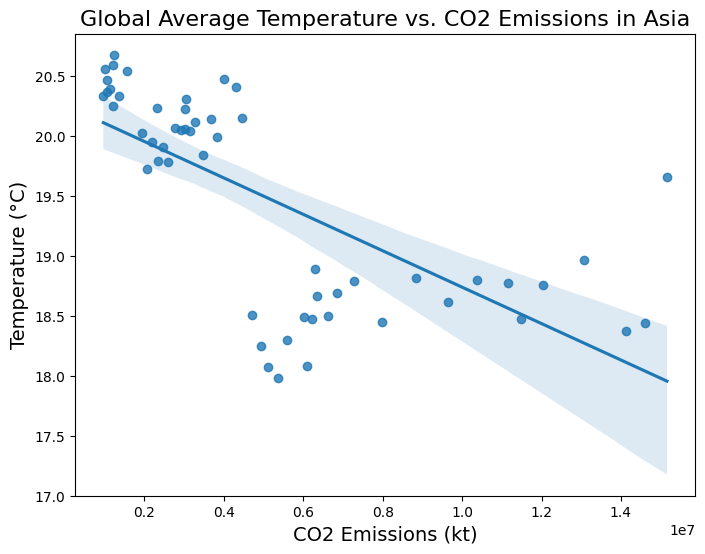

In [ ]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot scatterplot with regression line
sns.regplot(x='CarbonEmissions', y='AverageTemperature', data=emissions_temp_asia_df, ax=ax)

# Add axis labels and title
plt.xlabel('CO2 Emissions (kt)', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.title('Global Average Temperature vs. CO2 Emissions in Asia', fontsize=16)

# Show the plot
plt.show()

Overall decreasing trend but separated into two increasing parts. There are so many regions and this is quite tiring, so what if we did it all in one graph?

<Figure size 800x600 with 0 Axes>

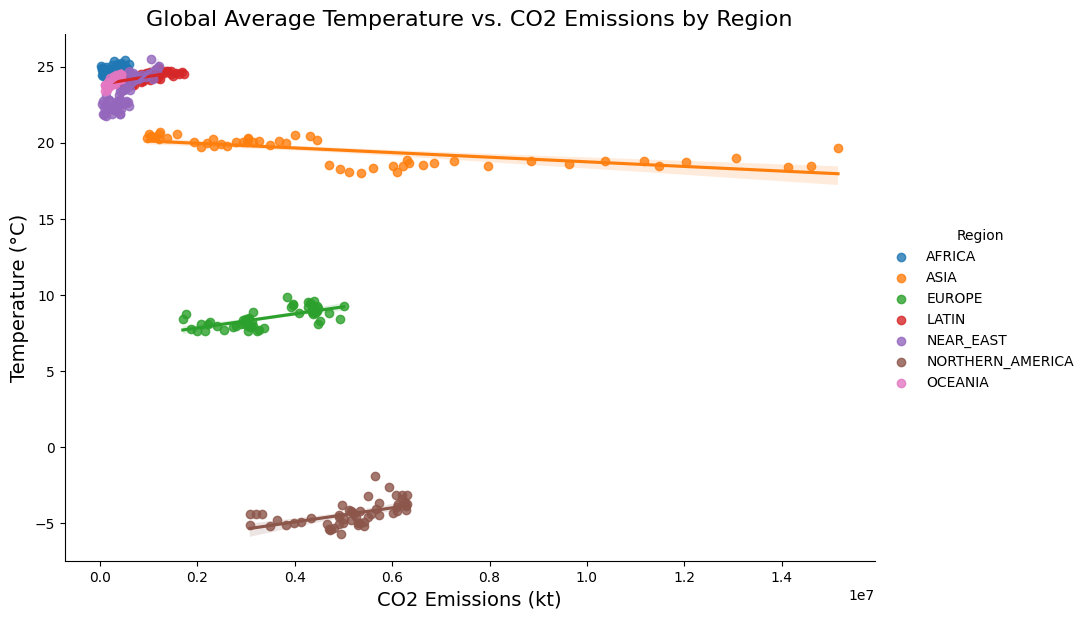

In [ ]:
# Create a figure and axis objects
fig = plt.figure(figsize=(8, 6))

# Plot scatterplot with regression line
sns.lmplot(x='CarbonEmissions', y='AverageTemperature', hue='Region', data=emissions_temp_regions_df, height=6, aspect=1.5)

# Add axis labels and title
plt.xlabel('CO2 Emissions (kt)', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.title('Global Average Temperature vs. CO2 Emissions by Region', fontsize=16)

# Show the plot
plt.show()

Asia was clearly responsible for the larger share of carbon emissions, yet the volcano eruption in the continent still caused its temperature over the time period to decrease.

It is also interesting to note how Africa, Oceania, Latin America and the Middle East all experienced quite similar temperature and carbon emission ranges. However, the increase in carbon emissions increased the Middle East's temperature by a way larger factor than it did in Latin America, for example.

Finally, both Europe and North America experienced small but steady increases in temperature as carbon emissions increased.

We can also try to visualize the lineplot with all regions!

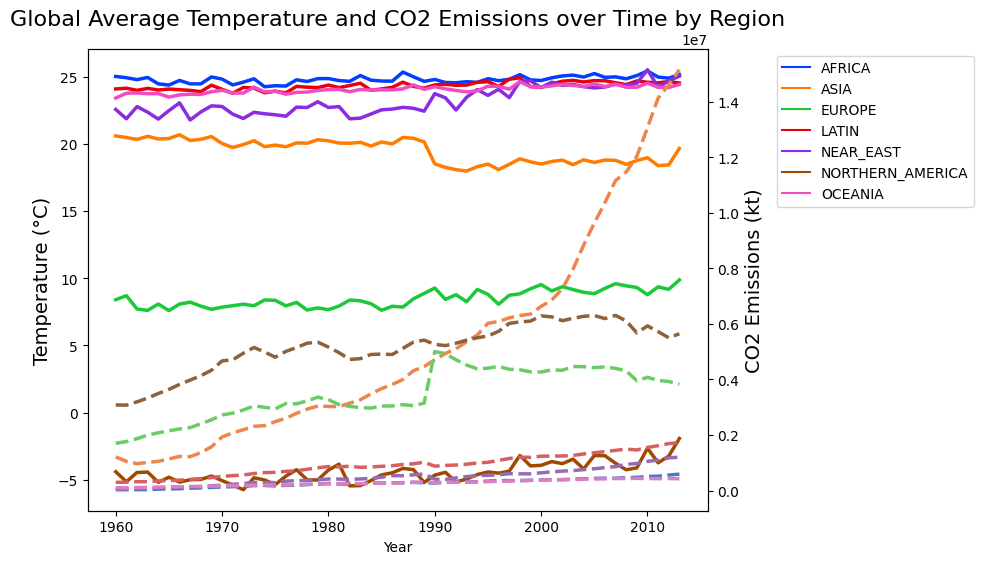

In [ ]:
# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot temperature on first y-axis
sns.lineplot(x='Year', y='AverageTemperature', data=emissions_temp_regions_df, ax=ax1, hue='Region', palette='bright', linewidth=2.5)
ax1.set_ylabel('Temperature (°C)', fontsize=14)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot CO2 emissions on second y-axis
sns.lineplot(x='Year', y='CarbonEmissions', data=emissions_temp_regions_df, ax=ax2, hue='Region', palette='muted', linewidth=2.5, linestyle='--')
ax2.set_ylabel('CO2 Emissions (kt)', fontsize=14)

# First remove automatic legends inside plot
ax1.get_legend().remove()
ax2.get_legend().remove()

# Then add legend outside the plot
handles, labels = [], []
for ax in [ax1]:
    h, l = ax.get_legend_handles_labels()
    handles += h
    labels += l
ax1.legend(handles, labels, bbox_to_anchor=(1.1, 1), loc='upper left')

# Remove gridlines
ax1.grid(False)
ax2.grid(False)

# Add title and axis labels
plt.title('Global Average Temperature and CO2 Emissions over Time by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)

# Show the plot
plt.show()

It is very clouded, but some information is clearly visible. For carbon emissions, we can see that Asia has a seemingly exponential increase in carbon emissions and in Europe, after a sharp rise around late 1980's, there is a gradual decrease (yes, that's right!) in carbon emissions. Fascinating! Every other region experiences an almost constant gradual increase.

In regards to temperature, you can see a general trend of slowly increasing temperature over time, with the exception of Asia, which has a decrease due to the already mentioned volcanic eruption. It is interesting to note how North American and (especially) the Middle East experience more temperature oscillation over the years than other regions.

### K-Means Clustering


We run K-Means Clustering to see if there are groups of countries and/or years where the temperature change and other features are similar. We will graph the average values of the most important features (determined from PCA further down).

In [ ]:
features = impute_df.drop(columns = 'temp_change')
from sklearn.cluster import KMeans

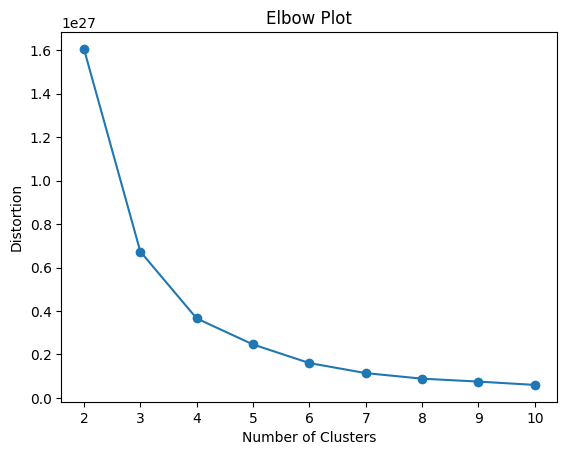

In [ ]:
distortions = []

max_k = 10
for i in range(2, max_k + 1):
  km = KMeans(n_clusters = i,
              n_init = 5,
              random_state = 0)
  km.fit(features)
  # The distortion
  distortions.append(km.inertia_)

plt.plot(range(2, max_k + 1), distortions, marker = 'o')
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.title("Elbow Plot")
plt.show()

From the figure above we see the elbow occurs at 4 clusters so we will use 4 clusters for our K-Means.

In [ ]:
kmeans =  km = KMeans(n_clusters = 4,
              n_init = 5,
              random_state = 0).fit(features)

In [ ]:
impute_df['cluster'] = km.labels_

In [ ]:
print("Cluster sizes:", [sum(km.labels_ == i) for i in range(4)])

Cluster sizes: [7429, 17, 51, 199]


We can see that almost all the data is in cluster 0, while we have some outliers in clusters 1 and 2. It would be interesting to see what data are in those two clusters.

In [ ]:
maincluster = impute_df[impute_df['cluster'] == 0]
maincluster.head()

,Year,AverageTemperature,CarbonEmissions,land_area,total_military,pct_military_gdp,gdp,population,temp_change,Country_Afghanistan,...,Country_Zambia,Country_Zimbabwe,Region_AFRICA,Region_ASIA,Region_EUROPE,Region_LATIN,Region_NEAR_EAST,Region_NORTHERN_AMERICA,Region_OCEANIA,cluster
0,1960.0,13.985417,414.371,461464.128279,63163.328454,3.120139,5.377778e+08,8996973.0,-0.129311,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,1961.0,14.064917,491.378,652860.000000,66321.619480,3.085322,5.488889e+08,9169410.0,0.079500,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,1962.0,13.768667,689.396,652860.000000,66725.022483,3.060389,5.466667e+08,9351441.0,-0.296250,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,1963.0,15.033417,707.731,652860.000000,67128.166792,2.991990,7.511112e+08,9543205.0,1.264750,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,1964.0,13.084917,839.743,652860.000000,67564.847346,3.018660,8.000000e+08,9744781.0,-1.948500,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


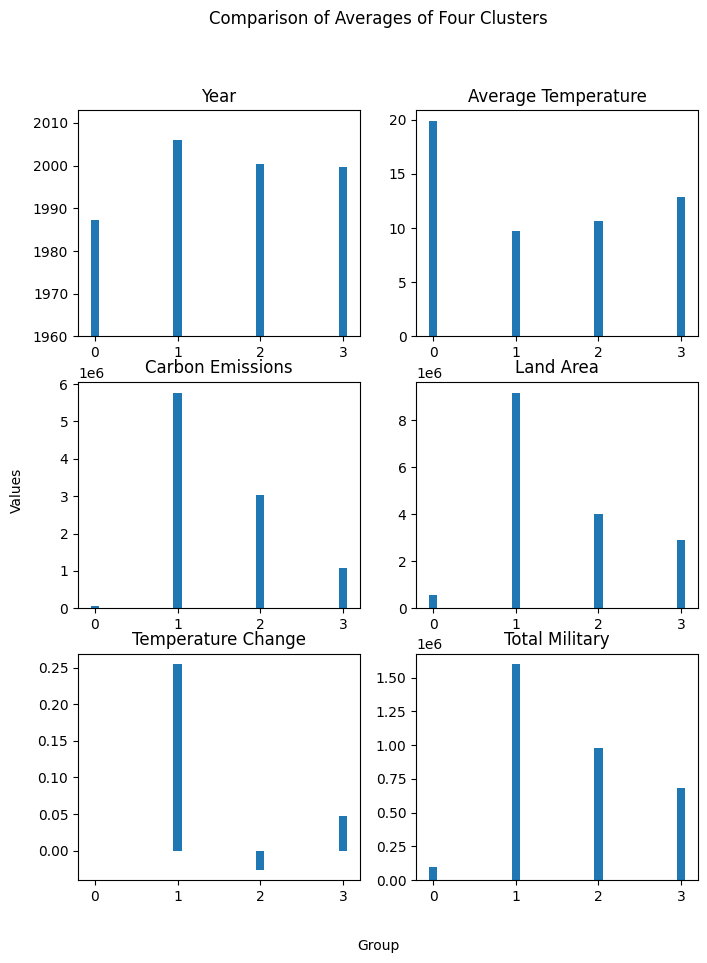

In [ ]:
selected_features = ['Year', 'AverageTemperature', 'CarbonEmissions', 'land_area', 'cluster', 'temp_change', 'total_military']
grouped_df = impute_df[selected_features]
grouped_df = grouped_df.groupby('cluster').mean()

# create a boxplot of the mean values of each feature across different clusters
fig, ax = plt.subplots(3, 2, figsize=(8, 10))
width = 0.1
x = range(len(grouped_df))

ax[0, 0].bar(x, grouped_df['Year'], width=width)
ax[0, 0].set_title('Year')
ax[0, 0].set_ylim(1960, 2013) 
ax[0, 1].bar(x, grouped_df['AverageTemperature'], width=width)
ax[0, 1].set_title('Average Temperature')
ax[1, 0].bar(x, grouped_df['CarbonEmissions'], width=width)
ax[1, 0].set_title('Carbon Emissions')
ax[1, 1].bar(x, grouped_df['land_area'], width=width)
ax[1, 1].set_title('Land Area')
ax[2, 0].bar(x, grouped_df['temp_change'], width=width)
ax[2, 0].set_title('Temperature Change')
ax[2, 1].bar(x, grouped_df['total_military'], width=width)
ax[2, 1].set_title('Total Military')


for axi in ax.flat:
    axi.set_xticks(x)
    axi.set_xticklabels(grouped_df.index)

# set the title and axis labels
fig.suptitle('Comparison of Averages of Four Clusters')
fig.text(0.5, 0.04, 'Group', ha='center')
fig.text(0.04, 0.5, 'Values', va='center', rotation='vertical')



# show the plot
plt.show()

These graphs reveal the average values of the most important features per cluster. 

Cluster 0 has low temperature change, carbon emissions, and military, but a high average temperature. We can see that cluster 1 has high temperature change, military size, land area, and carbon emissions. In addition, clusters 2 and 3 have low temperature change.  

Seeing as though cluster 1 has both high average temperature change and carbon emissions, let us take a look at the region make up of this cluster.

In [ ]:
print(impute_df[impute_df['cluster'] == 1]['Region_AFRICA'].sum(),
impute_df[impute_df['cluster'] == 1]['Region_ASIA'].sum(),
impute_df[impute_df['cluster'] == 1]['Region_EUROPE'].sum(),
impute_df[impute_df['cluster'] == 1]['Region_LATIN'].sum(),
impute_df[impute_df['cluster'] == 1]['Region_NEAR_EAST'].sum(),
impute_df[impute_df['cluster'] == 1]['Region_NORTHERN_AMERICA'].sum(),
impute_df[impute_df['cluster'] == 1]['Region_OCEANIA'].sum())

0.0 1.0 0.0 0.0 0.0 16.0 0.0


In [ ]:
impute_df[impute_df['cluster'] == 1][impute_df['Region_NORTHERN_AMERICA'] ==1]

<ipython-input-143-4faa79eccf08>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  impute_df[impute_df['cluster'] == 1][impute_df['Region_NORTHERN_AMERICA'] ==1]


,Year,AverageTemperature,CarbonEmissions,land_area,total_military,pct_military_gdp,gdp,population,temp_change,Country_Afghanistan,...,Country_Zambia,Country_Zimbabwe,Region_AFRICA,Region_ASIA,Region_EUROPE,Region_LATIN,Region_NEAR_EAST,Region_NORTHERN_AMERICA,Region_OCEANIA,cluster
7448,1998.0,10.141167,5.590540e+06,9158960.0,1594000.0,3.017625,9.062818e+12,275854000.0,0.968250,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7449,1999.0,9.567000,5.609020e+06,9158960.0,1575000.0,2.908401,9.630664e+12,279040000.0,-0.574167,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7450,2000.0,9.649750,5.775810e+06,9161920.0,1454800.0,2.933440,1.025235e+13,282162411.0,0.082750,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7451,2001.0,9.785583,5.748260e+06,9161920.0,1420700.0,2.944343,1.058182e+13,284968955.0,0.135833,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7452,2002.0,9.816167,5.593030e+06,9161920.0,1467000.0,3.249549,1.093642e+13,287625193.0,0.030583,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7453,2003.0,9.755083,5.658990e+06,9161920.0,1480000.0,3.607286,1.145824e+13,290107933.0,-0.061083,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7454,2004.0,9.667500,5.738290e+06,9161920.0,1473000.0,3.785571,1.221373e+13,292805298.0,-0.087583,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7455,2005.0,9.892667,5.753490e+06,9161920.0,1546000.0,3.861065,1.303664e+13,295516599.0,0.225167,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7456,2006.0,9.974500,5.653080e+06,9161920.0,1498000.0,3.819580,1.381461e+13,298379912.0,0.081833,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7457,2007.0,9.837500,5.736320e+06,9161920.0,1555000.0,3.853906,1.445186e+13,301231207.0,-0.137000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [ ]:
impute_df[impute_df['cluster'] == 1][impute_df['Region_ASIA'] ==1]

<ipython-input-144-5b72290b66bf>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  impute_df[impute_df['cluster'] == 1][impute_df['Region_ASIA'] ==1]


,Year,AverageTemperature,CarbonEmissions,land_area,total_military,pct_military_gdp,gdp,population,temp_change,Country_Afghanistan,...,Country_Zambia,Country_Zimbabwe,Region_AFRICA,Region_ASIA,Region_EUROPE,Region_LATIN,Region_NEAR_EAST,Region_NORTHERN_AMERICA,Region_OCEANIA,cluster
1583,2013.0,9.295,9.984570e+06,9388211.25,2993000.0,1.866944,9.570406e+12,1.357380e+09,2.217917,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
print(
impute_df[impute_df['cluster'] == 1][impute_df['Region_ASIA'] ==1][['Country_China']].sum(),
impute_df[impute_df['cluster'] == 1][impute_df['Region_NORTHERN_AMERICA'] ==1][['Country_United States']].sum())

Country_China    1.0
dtype: float64 Country_United States    16.0
dtype: float64


<ipython-input-146-55086ed36fee>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  impute_df[impute_df['cluster'] == 1][impute_df['Region_ASIA'] ==1][['Country_China']].sum(),
<ipython-input-146-55086ed36fee>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  impute_df[impute_df['cluster'] == 1][impute_df['Region_NORTHERN_AMERICA'] ==1][['Country_United States']].sum())


We can see that cluster 1 is made up of 16 occurences in North America and one in Asia. We hypothesized the countries behind these occurences would be the U.S. and China, and by querying the data we see this is true. This suggests the US and China have similarities among the features in the data, that is, average temperature, land area, carbon emissions, temperature change, and total military.
The occurences for the U.S. appear consecutively between the years 1998 and 2013. The occurrence for China is in the year 2013.

### T-SNE

In [ ]:
# Split the data into training and test sets
features = impute_df.drop(columns= ['temp_change', 'cluster'])
target = impute_df['temp_change']
seed = 37
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed)

# Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
!pip install openTSNE
from openTSNE import TSNE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 58.8 MB/s eta 0:00:00


In [ ]:
tsne = TSNE(
    perplexity=50,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

In [ ]:
%time 
embedding_train = tsne.fit(scaled_X_train)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, perplexity=50, random_state=42,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 150 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 7.80 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.48 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.21 seconds
===> Running optimization with exaggeration=12.00, lr=513.00 for 250 iterations...
Iteration   50, KL divergence 2.4560, 50 iterations in 4.6972 sec
Iteration  100, KL divergence 2.0954, 50 iterations in 3.9410 sec
Iteration  150, KL divergence 1.7965, 50 iterations in 3.2377 sec
Iteration  200, KL divergence 1.6216, 50 iterations in 3.3325 sec
Iteration  250, KL divergence 1.5040, 50 iterations in 4.9129 sec
   --> Time elapsed: 20.12 seconds
===> Running optimizatio

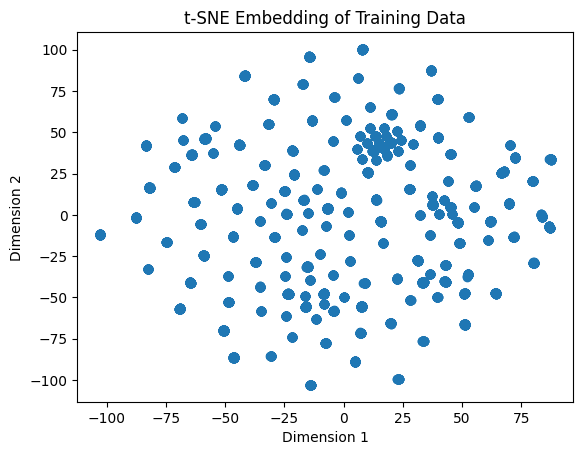

In [ ]:
plt.scatter(embedding_train[:, 0], embedding_train[:, 1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("t-SNE Embedding of Training Data")
plt.show()

In [ ]:
# Fit a linear regression model on the t-SNE transformed data
regressor = LinearRegression()
regressor.fit(embedding_train, y_train)

# Predict on the t-SNE transformed test data
embedding_test = tsne.fit(scaled_X_test)
y_pred = regressor.predict(embedding_test)

# Evaluate the performance of the regression model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2:.4f}")
print(f"Mean squared error: {mse:.4f}")

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, perplexity=50, random_state=42,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 150 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 1.38 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.10 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=12.00, lr=128.33 for 250 iterations...
Iteration   50, KL divergence 3.2504, 50 iterations in 0.7790 sec
Iteration  100, KL divergence 3.2005, 50 iterations in 0.8216 sec
Iteration  150, KL divergence 3.1895, 50 iterations in 1.1145 sec
Iteration  200, KL divergence 3.1867, 50 iterations in 1.1154 sec
Iteration  250, KL divergence 3.1866, 50 iterations in 1.1266 sec
   --> Time elapsed: 4.96 seconds
===> Running optimization

Given our t-SNE results, we can see that the data mostly does not contain any meaningful structure that can be captured by t-SNE. For most values of perplexity, the scatter plot appears circular and has a uniform distribution of points, suggesting that the t-SNE algorithm is not able to capture the underlying structure of the higher-dimensional data. Perplexity is usually between 5 and 50 but non circular and uniform structure is not apparent until around perplexity 100. Our visualization is supported by our linear regression, which has negative R^2 value.

Let's try t-SNE without some of our outliers, by only running it on data in cluster 0 from our K-Means Clustering.

In [ ]:
# Split the data into training and test sets
features = maincluster.drop(columns= ['temp_change', 'cluster'])
target = maincluster['temp_change']
seed = 37
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed)

# Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
tsne = TSNE(
    perplexity=50,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

In [ ]:
%time embedding_train = tsne.fit(scaled_X_train)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, perplexity=50, random_state=42,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 150 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 11.98 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.44 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.21 seconds
===> Running optimization with exaggeration=12.00, lr=495.25 for 250 iterations...
Iteration   50, KL divergence 2.4687, 50 iterations in 3.1098 sec
Iteration  100, KL divergence 2.1239, 50 iterations in 3.5253 sec
Iteration  150, KL divergence 1.8477, 50 iterations in 4.4607 sec
Iteration  200, KL divergence 1.6884, 50 iterations in 3.5890 sec
Iteration  250, KL divergence 1.5808, 50 iterations in 3.2850 sec
   --> Time elapsed: 17.98 seconds
===> Running optimizati

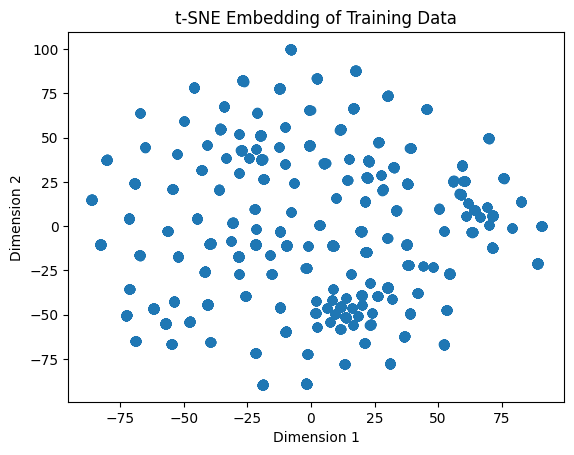

In [ ]:
plt.scatter(embedding_train[:, 0], embedding_train[:, 1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("t-SNE Embedding of Training Data")
plt.show()

In [ ]:
# Fit a linear regression model on the t-SNE transformed data
regressor = LinearRegression()
regressor.fit(embedding_train, y_train)

# Predict on the t-SNE transformed test data
embedding_test = tsne.fit(scaled_X_test)
y_pred = regressor.predict(embedding_test)

# Evaluate the performance of the regression model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2:.4f}")
print(f"Mean squared error: {mse:.4f}")

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, perplexity=50, random_state=42,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 150 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 1.95 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.15 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.08 seconds
===> Running optimization with exaggeration=12.00, lr=123.83 for 250 iterations...
Iteration   50, KL divergence 3.2109, 50 iterations in 0.8603 sec
Iteration  100, KL divergence 3.1416, 50 iterations in 0.8098 sec
Iteration  150, KL divergence 3.1236, 50 iterations in 0.6784 sec
Iteration  200, KL divergence 3.1231, 50 iterations in 0.4511 sec
Iteration  250, KL divergence 3.1231, 50 iterations in 0.4374 sec
   --> Time elapsed: 3.24 seconds
===> Running optimization

The scatter plot still has a uniform circular distribution and our linear model still does not perform great, so even within cluster 0 t-SNE has a hard time detecting underlying structures.

# Part 3: Modeling

In this section we fit models to **all_features_df** using the outcome variable **temp_change**.

We fit unregularized and regularized linear regressions, decision trees and ensemble models using trees, as well as a basic neural network. We first fit the models using the original features, then we fit the same models after reducing the dimensionality of the data with PCA.

Lastly, we compare the R^2 score and MSE of the all the models to determine the most effective.



### Models without PCA



In [ ]:
# Preparing Data
features = impute_df.drop(columns = 'temp_change')
target = impute_df['temp_change']
seed = 37
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = seed)

#### Unregularized linear regression

In [ ]:
reg = LinearRegression()

# Use the model to predict on the test set and save these predictions as `y_pred`
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
lin_reg_score = r2_score(y_test, y_pred)
lin_reg_mse = mean_squared_error(y_test, y_pred)
print(lin_reg_score)
print(lin_reg_mse)

-0.137876192321865
2.463785193451189


#### Ridge Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit
scaler.fit(X_train)

# Transform
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Ridge

reg_ridge = Ridge()
reg_ridge.fit(X_train_sc, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_ridge.predict(X_test_sc)

ridge_score = r2_score(y_test, y_pred)
ridge_mse = mean_squared_error(y_test, y_pred)
print(ridge_score)
print(ridge_mse)

0.028830301718790197
2.1028241377220747


#### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

reg_lasso = Lasso()
reg_lasso.fit(X_train_sc, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_lasso.predict(X_test_sc)

lasso_score = r2_score(y_test, y_pred)
lasso_mse = mean_squared_error(y_test, y_pred)
print(lasso_score)
print(lasso_mse)

-0.00021335731916249934
2.165710889008555


#### Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet

reg_elastic = ElasticNet()
reg_elastic.fit(X_train_sc, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_elastic.predict(X_test_sc)

elastic_score = r2_score(y_test, y_pred)
elastic_mse = mean_squared_error(y_test, y_pred)
print(elastic_score, elastic_mse)

-0.00021335731916249934 2.165710889008555


#### Simple Decision Tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(random_state=42)

clf.fit(X_train, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = clf.predict(X_test)

tree_score = r2_score(y_test, y_pred)
tree_mse = mean_squared_error(y_test, y_pred)
print(tree_score, tree_mse)

-0.86459640023164 4.037315336810941


#### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

clf = RandomForestRegressor(max_depth=30, random_state=42, n_estimators=120)
clf.fit(X_train, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`

y_pred = clf.predict(X_test)
# Find the accuracy and store the value in `rf_acc`
rf_score = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
print(rf_score, rf_mse)

0.35953424163684256 1.3867677898662654


#### Gradient Boosting Regressor

First we run an algorithm to determine the number of estimators that leads to the highest score.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# list of numbers of estimators to try
n_estimators_list = [25, 40, 50, 75, 100]

results_df = pd.DataFrame(columns=['n_estimators', 'R2_score'])

# Loop over the different numbers of estimators
for n_estimators in n_estimators_list:
    # Initialize the GradientBoostingRegressor model with the current number of estimators
    model = GradientBoostingRegressor(n_estimators=n_estimators, random_state = 42)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the validation data
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error
    score = model.score(X_test, y_test)
    
    # Append the results to the dataframe
    results_df = results_df.append({'n_estimators': n_estimators, 'R2_score': score}, ignore_index=True)

# Print the results dataframe
print(results_df)

<ipython-input-158-f858c371d9ed>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'n_estimators': n_estimators, 'R2_score': score}, ignore_index=True)
<ipython-input-158-f858c371d9ed>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'n_estimators': n_estimators, 'R2_score': score}, ignore_index=True)
<ipython-input-158-f858c371d9ed>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'n_estimators': n_estimators, 'R2_score': score}, ignore_index=True)
<ipython-input-158-f858c371d9ed>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_d

   n_estimators  R2_score
0          25.0  0.418527
1          40.0  0.434016
2          50.0  0.430082
3          75.0  0.427893
4         100.0  0.419969


<ipython-input-158-f858c371d9ed>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'n_estimators': n_estimators, 'R2_score': score}, ignore_index=True)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(n_estimators = 40, random_state=42).fit(X_train, y_train)
gb_score = clf.score(X_test, y_test)
gb_mse = mean_squared_error(y_test, y_pred)
print(gb_score, gb_mse)

0.4340159377722099 1.255911535775255


#### Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor
clf = BaggingRegressor(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
bag_score = r2_score(y_test, y_pred)
bag_mse = mean_squared_error(y_test, y_pred)
print(bag_score, bag_mse)

0.30920470601739103 1.4957437623747079


#### Multi-layer Perceptron

In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train_sc = scaler.transform(X_train)  
# apply same transformation to test data
X_test_sc = scaler.transform(X_test)  

In [ ]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the model on the training data
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)
# Evaluate the model on the validation data
mlp_score = model.score(X_test_sc, y_test)
mlp_mse = mean_squared_error(y_test, y_pred)
print("R² score on validation set:", mlp_score)

R² score on validation set: 0.0774888966766315


In [ ]:
#comparing accuracies without PCA
data = [('Linear Reg', lin_reg_score, lin_reg_mse), ('Ridge', ridge_score, ridge_mse), ('Lasso', lasso_score, lasso_mse), 
        ('Elastic Net', elastic_score, elastic_mse), ('Decision Tree', tree_score, tree_mse), ('Random Forest', rf_score, rf_mse),
        ('Gradient Boosting', gb_score, gb_mse), ('Bagging', bag_score, bag_mse), ('NN', mlp_score, mlp_mse)]

non_pca_accuracy = pd.DataFrame(data, columns=['Model', 'R^2', 'MSE'])
non_pca_accuracy.sort_values(by = ['R^2', 'MSE'], ascending = [False, True])

,Model,R^2,MSE
6,Gradient Boosting,0.434016,1.255912
5,Random Forest,0.359534,1.386768
7,Bagging,0.309205,1.495744
8,NN,0.077489,1.997466
1,Ridge,0.028830,2.102824
2,Lasso,-0.000213,2.165711
3,Elastic Net,-0.000213,2.165711
0,Linear Reg,-0.137876,2.463785
4,Decision Tree,-0.864596,4.037315


After creating all our models we see that over half of the models fit the data very poorly. Linear models seem to be an especially poor fit for this data. We have three models-- Gradient Boosting, Random Forest, and Bagging-- that seem to fit the data decently.

### PCA for Dimensionality Reduction


#### PCA on one hot encoded data

In [ ]:
features = impute_df.drop(columns = 'temp_change')
target = impute_df['temp_change']

In [ ]:
# Split data into testing and training data 
seed = 37
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = seed)

In [ ]:
# PCA is not scale-invariant so we need to standardize 

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

#Instantiate and Fit PCA
pca = PCA(n_components = scaled_X_train.shape[1])
pca_x_train = pca.fit_transform(scaled_X_train)

# Now, we get the cumulative explained variance ratios so that we can graph and see how many features we should use

explained_variance_ratios = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance_ratios)

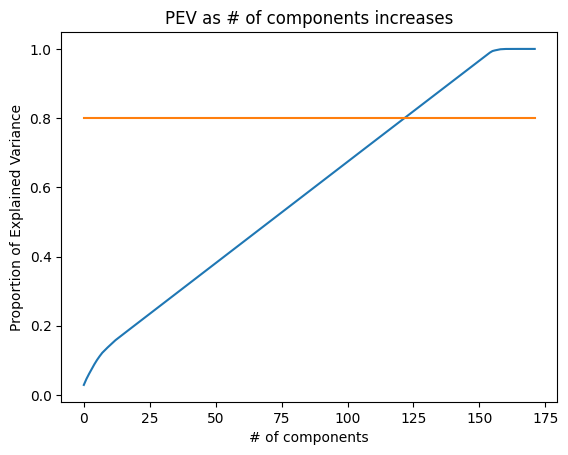

In [ ]:
# Graphing the cumulative explained variance ratio
plt.plot(np.arange(0, 172), cum_explained_variance)
plt.plot(np.arange(0, 172), [0.8]*172)
plt.xlabel("# of components")
plt.ylabel("Proportion of Explained Variance")
plt.title("PEV as # of components increases")
plt.show()

In [ ]:
n_components = np.argmax(cum_explained_variance >= 0.8)
n_components

122

In [ ]:
# Refitting and transforming PCA on training data with the reduced number of components (120)
pca = PCA(n_components)
pca_x_train = pca.fit_transform(scaled_X_train)

X_test_pca = pca.transform(scaled_X_test)

In [ ]:
# Train a regression model on the transformed training data
model = LinearRegression()
model.fit(pca_x_train, y_train)

# Evaluate the model's performance on the transformed test data
y_pred = model.predict(X_test_pca)
lin_reg_mse = mean_squared_error(y_test, y_pred)
lin_reg_score = r2_score(y_test, y_pred)

print(lin_reg_score)
print(lin_reg_mse)

-0.029257171174662977
2.228597975513564


In [ ]:
# Get new dataframe with reduced dimensionality
cols = X_train.columns[:n_components]
df_reduced = pd.DataFrame(data=impute_df, columns=cols)
df_reduced.head(2)

,Year,AverageTemperature,CarbonEmissions,land_area,total_military,pct_military_gdp,gdp,population,Country_Afghanistan,Country_Albania,...,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Norway,Country_Oman,Country_Pakistan,Country_Palau,Country_Panama,Country_Papua New Guinea
0,1960.0,13.985417,414.371,461464.128279,63163.328454,3.120139,5.377778e+08,8996973.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1961.0,14.064917,491.378,652860.000000,66321.619480,3.085322,5.488889e+08,9169410.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
left_out_cols = set(impute_df.columns) - set(df_reduced.columns)
left_out_cols

{'Country_Paraguay',
 'Country_Peru',
 'Country_Philippines',
 'Country_Poland',
 'Country_Portugal',
 'Country_Qatar',
 'Country_Romania',
 'Country_Rwanda',
 'Country_Samoa',
 'Country_Saudi Arabia',
 'Country_Senegal',
 'Country_Serbia',
 'Country_Seychelles',
 'Country_Sierra Leone',
 'Country_Singapore',
 'Country_Slovenia',
 'Country_Solomon Islands',
 'Country_Somalia',
 'Country_Spain',
 'Country_Sri Lanka',
 'Country_Sudan',
 'Country_Suriname',
 'Country_Sweden',
 'Country_Switzerland',
 'Country_Tajikistan',
 'Country_Tanzania',
 'Country_Thailand',
 'Country_Togo',
 'Country_Tonga',
 'Country_Tunisia',
 'Country_Turkey',
 'Country_Turkmenistan',
 'Country_Uganda',
 'Country_Ukraine',
 'Country_United Arab Emirates',
 'Country_United Kingdom',
 'Country_United States',
 'Country_Uruguay',
 'Country_Uzbekistan',
 'Country_Vietnam',
 'Country_Zambia',
 'Country_Zimbabwe',
 'Region_AFRICA',
 'Region_ASIA',
 'Region_EUROPE',
 'Region_LATIN',
 'Region_NEAR_EAST',
 'Region_NORTHER

As we can see the features we excluded are the regions and some of the country names. It seems like country and region are the two least important columns so let's run PCA without those two columns again.


#### PCA without Country and Region

In [ ]:
all_features_df2 = all_features_df.drop(columns = ['Country Code', 'Country', 'Region'])
all_features_df2.head(2)

,Year,AverageTemperature,CarbonEmissions,land_area,total_military,pct_military_gdp,gdp,population,temp_change
0,1960,13.985417,414.371,NaN,NaN,NaN,5.377778e+08,8996973.0,NaN
1,1961,14.064917,491.378,652860.0,NaN,NaN,5.488889e+08,9169410.0,0.0795


In [ ]:
# Impute the missing values

imp = IterativeImputer(max_iter=10, random_state=0)
impute_df2 = pd.DataFrame(imp.fit_transform(all_features_df2))

impute_df2 = impute_df2.rename(columns=dict(zip(impute_df2.columns, all_features_df2.columns)))
impute_df2.head(2)

,Year,AverageTemperature,CarbonEmissions,land_area,total_military,pct_military_gdp,gdp,population,temp_change
0,1960.0,13.985417,414.371,461464.127832,63163.328387,3.539133,5.377778e+08,8996973.0,-0.128627
1,1961.0,14.064917,491.378,652860.000000,66321.619424,3.504886,5.488889e+08,9169410.0,0.079500


In [ ]:
features2 = impute_df2.drop(columns = 'temp_change')
target2 = impute_df2['temp_change']
seed = 37
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size = 0.2, random_state = seed)

In [ ]:
# PCA is not scale-invariant so we need to standardize 

scaler = StandardScaler()
scaler.fit(X_train2)

scaled_X_train2 = scaler.transform(X_train2)
scaled_X_test2 = scaler.transform(X_test2)

#Instantiate and Fit PCA
pca2 = PCA(n_components = scaled_X_train2.shape[1])
pca_x_train2 = pca2.fit_transform(scaled_X_train2)

# Now, we get the cumulative explained variance ratios so that we can graph and see how many features we should use

explained_variance_ratios = pca2.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance_ratios)

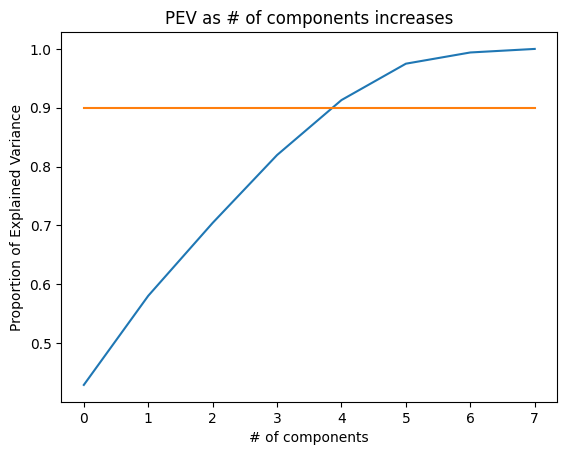

In [ ]:
# Graphing the cumulative explained variance ratio

plt.plot(np.arange(0, 8), cum_explained_variance)
plt.plot(np.arange(0, 8), [0.9]*8)
plt.xlabel("# of components")
plt.ylabel("Proportion of Explained Variance")
plt.title("PEV as # of components increases")
plt.show()

In [ ]:
# Refitting and transforming PCA on training data with the reduced number of components (4)
pca = PCA(n_components = 4)
pca_x_train2 = pca.fit_transform(scaled_X_train2)

X_test_pca2 = pca.transform(scaled_X_test2)

In [ ]:
model = LinearRegression()
model.fit(pca_x_train2, y_train2)

# Evaluate the model's performance on the transformed test data
y_pred = model.predict(X_test_pca2)
lin_reg_mse = mean_squared_error(y_test2, y_pred)
lin_reg_score = r2_score(y_test2, y_pred)

print(lin_reg_score)
print(lin_reg_mse)

0.006861288572561741
2.1503925196511884


In [ ]:
cols = X_train2.columns[:4]
df_reduced2 = pd.DataFrame(data=impute_df2, columns=cols)
df_reduced2

,Year,AverageTemperature,CarbonEmissions,land_area
0,1960.0,13.985417,414.371000,461464.127832
1,1961.0,14.064917,491.378000,652860.000000
2,1962.0,13.768667,689.396000,652860.000000
3,1963.0,15.033417,707.731000,652860.000000
4,1964.0,13.084917,839.743000,652860.000000
...,...,...,...,...
7691,2009.0,21.377250,7750.000000,386850.000000
7692,2010.0,21.986250,9600.000381,386850.000000
7693,2011.0,21.602417,11409.999847,386850.000000
7694,2012.0,21.521333,12010.000229,386850.000000


### Models with Dimensions Reduced
In this section we fit the same models as above, but with the features reduced with PCA.

#### Ridge Regression

In [ ]:
reg_ridge = Ridge()
reg_ridge.fit(pca_x_train2, y_train2)
y_pred = reg_ridge.predict(X_test_pca2)
ridge_score = r2_score(y_test2, y_pred)
ridge_mse = mean_squared_error(y_test2, y_pred)
print('Ridge regression: R2 score = {}, MSE = {}'.format(ridge_score, ridge_mse))

Ridge regression: R2 score = 0.006862648368919588, MSE = 2.150389575353597


#### Lasso Regression

In [ ]:
reg_lasso = Lasso()
reg_lasso.fit(pca_x_train2, y_train2)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_lasso.predict(X_test_pca2)

lasso_score = r2_score(y_test2, y_pred)
lasso_mse = mean_squared_error(y_test2, y_pred)
print('Lasso regression: R2 score = {}, MSE = {}'.format(lasso_score, lasso_mse))

Lasso regression: R2 score = -0.0002133595247775233, MSE = 2.1657108937842606


#### Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet

reg_elastic = ElasticNet()
reg_elastic.fit(pca_x_train2, y_train2)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_elastic.predict(X_test_pca2)

elastic_score = r2_score(y_test2, y_pred)
elastic_mse = mean_squared_error(y_test2, y_pred)
print('Elastic Net regression: R2 score = {}, MSE = {}'.format(elastic_score, elastic_mse))

Elastic Net regression: R2 score = -0.0002133595247775233, MSE = 2.1657108937842606


#### Simple Decision Tree

In [ ]:
clf = tree.DecisionTreeRegressor()

clf.fit(pca_x_train2, y_train2)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = clf.predict(X_test_pca2)

tree_score = r2_score(y_test2, y_pred)
tree_mse = mean_squared_error(y_test2, y_pred)
print('Simple decision tree: R2 score = {}, MSE = {}'.format(tree_score, tree_mse))

Simple decision tree: R2 score = -0.7099655389455699, MSE = 3.702501031829456


#### Random Forest Regressor

In [ ]:
clf = RandomForestRegressor(max_depth=30, random_state=42, n_estimators=120)
clf.fit(pca_x_train2, y_train2)

# Use the model to predict on the test set and save these predictions as `y_pred`

y_pred = clf.predict(X_test_pca2)
# Find the accuracy and store the value in `rf_acc`
rf_score = r2_score(y_test2, y_pred)
rf_mse = mean_squared_error(y_test2, y_pred)
print(rf_score, rf_mse)

-0.06644694501500537 2.3091230930561544


#### Gradient Boosting Regressor

In [ ]:
#list of numbers of estimators to try
n_estimators_list = [25, 40, 50, 75, 100]

# Initialize an empty dataframe to store the results
results_df = pd.DataFrame(columns=['n_estimators', 'R2_score'])

# Loop over the different numbers of estimators
for n_estimators in n_estimators_list:
    # Initialize the GradientBoostingRegressor model with the current number of estimators
    model = GradientBoostingRegressor(n_estimators=n_estimators)
    
    # Fit the model on the training data
    model.fit(pca_x_train2, y_train2)
    
    # Predict on the validation data
    y_pred = model.predict(X_test_pca2)
    
    # Calculate the mean squared error
    score = model.score(X_test_pca2, y_test2)
    
    # Append the results to the dataframe
    results_df = results_df.append({'n_estimators': n_estimators, 'R2_score': score}, ignore_index=True)

# Print the results dataframe
print(results_df)

<ipython-input-174-e9aca07332b8>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'n_estimators': n_estimators, 'R2_score': score}, ignore_index=True)
<ipython-input-174-e9aca07332b8>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'n_estimators': n_estimators, 'R2_score': score}, ignore_index=True)
<ipython-input-174-e9aca07332b8>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'n_estimators': n_estimators, 'R2_score': score}, ignore_index=True)
<ipython-input-174-e9aca07332b8>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_d

   n_estimators  R2_score
0          25.0 -0.033490
1          40.0 -0.038057
2          50.0 -0.042886
3          75.0 -0.038409
4         100.0 -0.043937


<ipython-input-174-e9aca07332b8>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'n_estimators': n_estimators, 'R2_score': score}, ignore_index=True)


In [ ]:
clf = GradientBoostingRegressor(n_estimators = 25, random_state=0).fit(pca_x_train2, y_train)
gb_score = clf.score(X_test_pca2, y_test2)
gb_mse = mean_squared_error(y_test2, y_pred)
print(gb_score, gb_mse)

-0.03339639907683023 2.2603836811598153


#### Bagging Regressor

In [ ]:
clf = BaggingRegressor(random_state=42)
clf.fit(pca_x_train2, y_train2)
y_pred = clf.predict(X_test_pca2)
bag_score = r2_score(y_test2, y_pred)
bag_mse = mean_squared_error(y_test2, y_pred)
print(bag_score, bag_mse)

-0.2865907624869124 2.7857892554884236


#### Multi-layer Perceptron

In [ ]:
scaler = StandardScaler()  
scaler.fit(pca_x_train2)  
X_train_sc = scaler.transform(pca_x_train2)  
# apply same transformation to test data
X_test_sc = scaler.transform(X_test_pca2)  

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the model on the training data
model.fit(X_train_sc, y_train2)
y_pred = model.predict(X_test_pca2)
# Evaluate the model on the validation data
mlp_score = model.score(X_test_sc, y_test2)
mlp_mse = mean_squared_error(y_test2, y_pred)
print("R² score on validation set:", mlp_score)

R² score on validation set: 0.06694595629382971


In [ ]:
data = [('PCA Linear Reg', lin_reg_score, lin_reg_mse), ('PCA Ridge', ridge_score, ridge_mse), ('PCA Lasso', lasso_score, lasso_mse), 
        ('PCA Elastic Net', elastic_score, elastic_mse), ('PCA Decision Tree', tree_score, tree_mse), ('PCA Random Forest', rf_score, rf_mse),
        ('PCA Gradient Boosting', gb_score, gb_mse), ('PCA Bagging', bag_score, bag_mse), ('PCA NN', mlp_score, mlp_mse)]
pca_accuracy = pd.DataFrame(data, columns=['Model', 'R^2', 'MSE'])
pca_accuracy.sort_values(by = ['R^2', 'MSE'], ascending = [False, True])

,Model,R^2,MSE
8,PCA NN,0.066946,2.442147
1,PCA Ridge,0.006863,2.150390
2,PCA Lasso,-0.000213,2.165711
3,PCA Elastic Net,-0.000213,2.165711
6,PCA Gradient Boosting,-0.033396,2.260384
5,PCA Random Forest,-0.066447,2.309123
0,PCA Linear Reg,-0.137876,2.463785
7,PCA Bagging,-0.286591,2.785789
4,PCA Decision Tree,-0.709966,3.702501


In [ ]:
accuracy_df = pd.concat([non_pca_accuracy, pca_accuracy])
accuracy_df.sort_values(by = ['R^2', 'MSE'], ascending = [False, True])

,Model,R^2,MSE
6,Gradient Boosting,0.434016,1.255912
5,Random Forest,0.359534,1.386768
7,Bagging,0.309205,1.495744
8,NN,0.077489,1.997466
8,PCA NN,0.066946,2.442147
1,Ridge,0.028830,2.102824
1,PCA Ridge,0.006863,2.150390
2,Lasso,-0.000213,2.165711
3,Elastic Net,-0.000213,2.165711
2,PCA Lasso,-0.000213,2.165711


We found the gradient boosted model has the greatest R^2 at 0.421. The three tree models provide the greatest explaination for the variation in temperature change. This makes sense as many of the features are categorical, with many possibilities, for instance the Country feature. We found that reducing dimensionality with PCA does not improve the models, and in fact make them worse. 

Linear models, both regularized and unregularized, fit the data very poorly, which is unsurprising as the features are too complex to be fit to a linear model.

The neural network also did not fit the data well. However, next steps could include fitting a more complex model and optimizing the paramters to fit the data more.

Amongst all models we did not see a high R^2 value. This is not entirely surprising as we are trying to predict temperature change for every country in various years. There are many confounding variables not accounted for in the data that make it hard to fit the same model to different countries and years.

# Part 4: Conclusion, Challenges and Next Steps
A trend of increasing changing average temperature was clearly seen globally, through a variety of different methods. Although it could be due to natural climate variability, such as the El Niño Southern Oscillation and volcanic activitym, these natural factors do not explain the overall trend of rising temperatures that has been observed over the past century. The Intergovernmental Panel on Climate Change (IPCC) has concluded that it is extremely likely that human activities have been the dominant cause of observed climate change since the mid-20th century. So how do we evaluate what the main human causes of climate change are?

The purpose of our study was to identify what the main instigators of climate change are so that we can combat those first and attempt to mitigate their effects. When we began our search for datasets, we found a recurrent problem of a lack of enough variables.

There are a few different parts to this. The first challenge faced is that not all factors that influence average temperature change were considered. Second, average temperature increase is not the only way to measure climate change, but also an increase in temperature volatility/oscillation, with more extreme seasons, warmer weather in the summer and colder in the winter, as well as drastic weather events such as thunderstorms and hurricanes. Third, there are climatic factors other than temperature that are important when analyzing climate change, such as global sea levels rise. 

1. **What other factors influence average temperature change?**

*   **Greenhouse gases (GHG)** are those that trap heat in the atmosphere. They are crucial for life on Earth, but they contribute to climate change if in excess. The most important GHGs in the Earth's atmosphere are water vapor (H2O), carbon dioxide (CO2), methane (CH4), nitrous oxide (NO2), and ozone (O3). Of those, carbon is of course the most significant GHG emitted, espeically due to burning of fossil fuels such as coal, oil, and gas, as well as through deforestation and other land-use changes. However, methane is also very importante and the second biggest contributor to climate change. It is released through agricultural practices such as livestock farming, crop cultivation, and waste management. Similarly, nitrous oxide is released through agricultural practices, including the use of nitrogen fertilizers, a potent GHG.
*   **Land use change** is the term used for the conversion of natural ecosystems, such as forests and grasslands, into agricultural or urban land. Not only is it a major driver of environmental change, it also hinders biodiversity, water filtration, pollination, and soil conservation. One of the primary impacts is through changes in the Earth's surface albedo (mentioned above), or reflectivity. If a forest is replaced with agricultural land, the albedo of that area will decrease, as the darker, more absorbent soil replaces the lighter, reflective leaves of the trees, leading to warming. In addition, as plants absorb CO2 from the atmosphere during photosynthesis and store it in their biomass and in the soil. So when that forest is replaced, the carbon cycle is disrupted, and the carbon stored in plants and soils is released to the atmosphere.
*   **Urbanization** is the process of population growth in urban areas and the resulting expansion of cities. In addition to land use changes, urban areas are often associated with high levels of energy consumption and air pollution. This is all known as the Heat Island Effect. Urban areas tend to be significantly warmer than rural areas due to the concentration of buildings, roads, and other infrastructure which absorb and trap heat, as well as the lack of vegetation and green spaces which help to cool down the surrounding area. This can lead to increased health risks for vulnerable populations, and a feedback loop of increasing temperatures.

2. **What factors other than average temperature change can be used to "measure" climate change?**

*   **Sea level rise** occurs due to melting glaciers and ice caps, which in turn occur due to temperature increases. This has significant impacts on coastal communities, ecosystems and wildlife. Another consequence of increasing. The sea level also rises due to the steric effect (or thermal expansion), which is that the spacing between atoms and molecules increases. Thus, as the Earth's temperature increases, the ocean waters expand and take up more space, causing the sea level to rise.
*   **Ocean acidification** occurs with rising carbon dioxide levels in the atmosphere, which then have to be absorbed by the oceans. This causes the pH of the water to decrease, making it more acidic. This can have significant impacts on marine life, particularly organisms with shells or skeletons made of calcium carbonate.
*   **Changes in precipitation patterns** in factors such as timing, intensity, and location of precipitation is due to climate change. This can lead to droughts in some areas and increased flooding in others.
*   **Melting of permafrost**, which is the frozen ground that covers much of the Arctic region causes the release of large amounts of methane and carbon dioxide that were previously trapped (frozen) into the atmosphere.
*   **Extreme weather events** are more frequent and more severe. Hurricanes, tornadoes, heat waves, wildfires and others can have significant impacts on human communities, as well as ecosystems and wildlife.
*   **Biodiversity loss** occurs as temperatures rise and weather patterns change. That is because many plant and animal species require specific temperature and pH conditions that are being changed. This can have cascading impacts on ecosystems and the services they provide to humans.

Wow, that was a lot! But all very important! These are all quite hard but key factors to measure to measure climate change. If you want to read more, click [here](https://www.un.org/en/climatechange/science/causes-effects-climate-change). Using big data to understand how these changes are occurring would definitely help to identify where our efforts should be placed. Climate change is happening in front of our eyes, and if we are indifferent to it, it will negatively affect us in the future when it most matters.

Another challenge we faced was multiple cases of negative R^2 values. It is quite interesting that even with complex models, some of them were predicting worse than the mean of the target values. The models that didn't have negative values had very low R^2 values. Ultimately, no model was great for predicting the average increase in temperature, and more research must be done. In the further research, it would be crucial to include measurements of some of the other factors explained above, which would most likely provide a significant increase to R^2 values. In addition, finding a statistically relevant means of standardizing temperature values after the large drop in temperature due to the volcano eruption in 1991 could help. This is not an event that generally occurs periodically or recurrently, so for future modeling it would be better to not consider it.